In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\

In [2]:
beer_data = pd.read_csv('Consumo_cerveja.csv')

In [3]:
beer_data.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


In [4]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
columns_new = {'Data':'Date','Temperatura Media (C)':'Temperature_Median','Temperatura Minima (C)':'Temperature_Min','Temperatura Maxima (C)':'Temprature_Max','Precipitacao (mm)':'Rainfall','Final de Semana':'Weekend','Consumo de cerveja (litros)':'Consumption_litres'}

In [6]:
beer_data.columns = ['Date','Temperature_Median','Temperature_Min','Temperature_Max','Rainfall','Weekend','Consumption_litres']

In [7]:
beer_data

,Date,Temperature_Median,Temperature_Min,Temperature_Max,Rainfall,Weekend,Consumption_litres
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
beer_data.shape

(941, 7)

In [9]:
beer_data.dropna(inplace = True)

In [10]:
beer_data.isna().sum()

Date                  0
Temperature_Median    0
Temperature_Min       0
Temperature_Max       0
Rainfall              0
Weekend               0
Consumption_litres    0
dtype: int64

In [11]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Temperature_Median  365 non-null    object 
 2   Temperature_Min     365 non-null    object 
 3   Temperature_Max     365 non-null    object 
 4   Rainfall            365 non-null    object 
 5   Weekend             365 non-null    float64
 6   Consumption_litres  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [12]:
beer_data['Temperature_Median'] = beer_data['Temperature_Median'].str.replace(',','.').astype('float')
beer_data['Temperature_Min'] = beer_data['Temperature_Min'].str.replace(',','.').astype('float')
beer_data['Temperature_Max'] = beer_data['Temperature_Max'].str.replace(',','.').astype('float')
beer_data['Rainfall'] = beer_data['Rainfall'].str.replace(',','.').astype('float')

In [13]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Temperature_Median  365 non-null    float64
 2   Temperature_Min     365 non-null    float64
 3   Temperature_Max     365 non-null    float64
 4   Rainfall            365 non-null    float64
 5   Weekend             365 non-null    float64
 6   Consumption_litres  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [14]:
beer_data.describe()

,Temperature_Median,Temperature_Min,Temperature_Max,Rainfall,Weekend,Consumption_litres
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [15]:
x = beer_data.drop(columns=['Date','Consumption_litres'])
y = beer_data['Consumption_litres']

In [16]:
corr = x.corr()

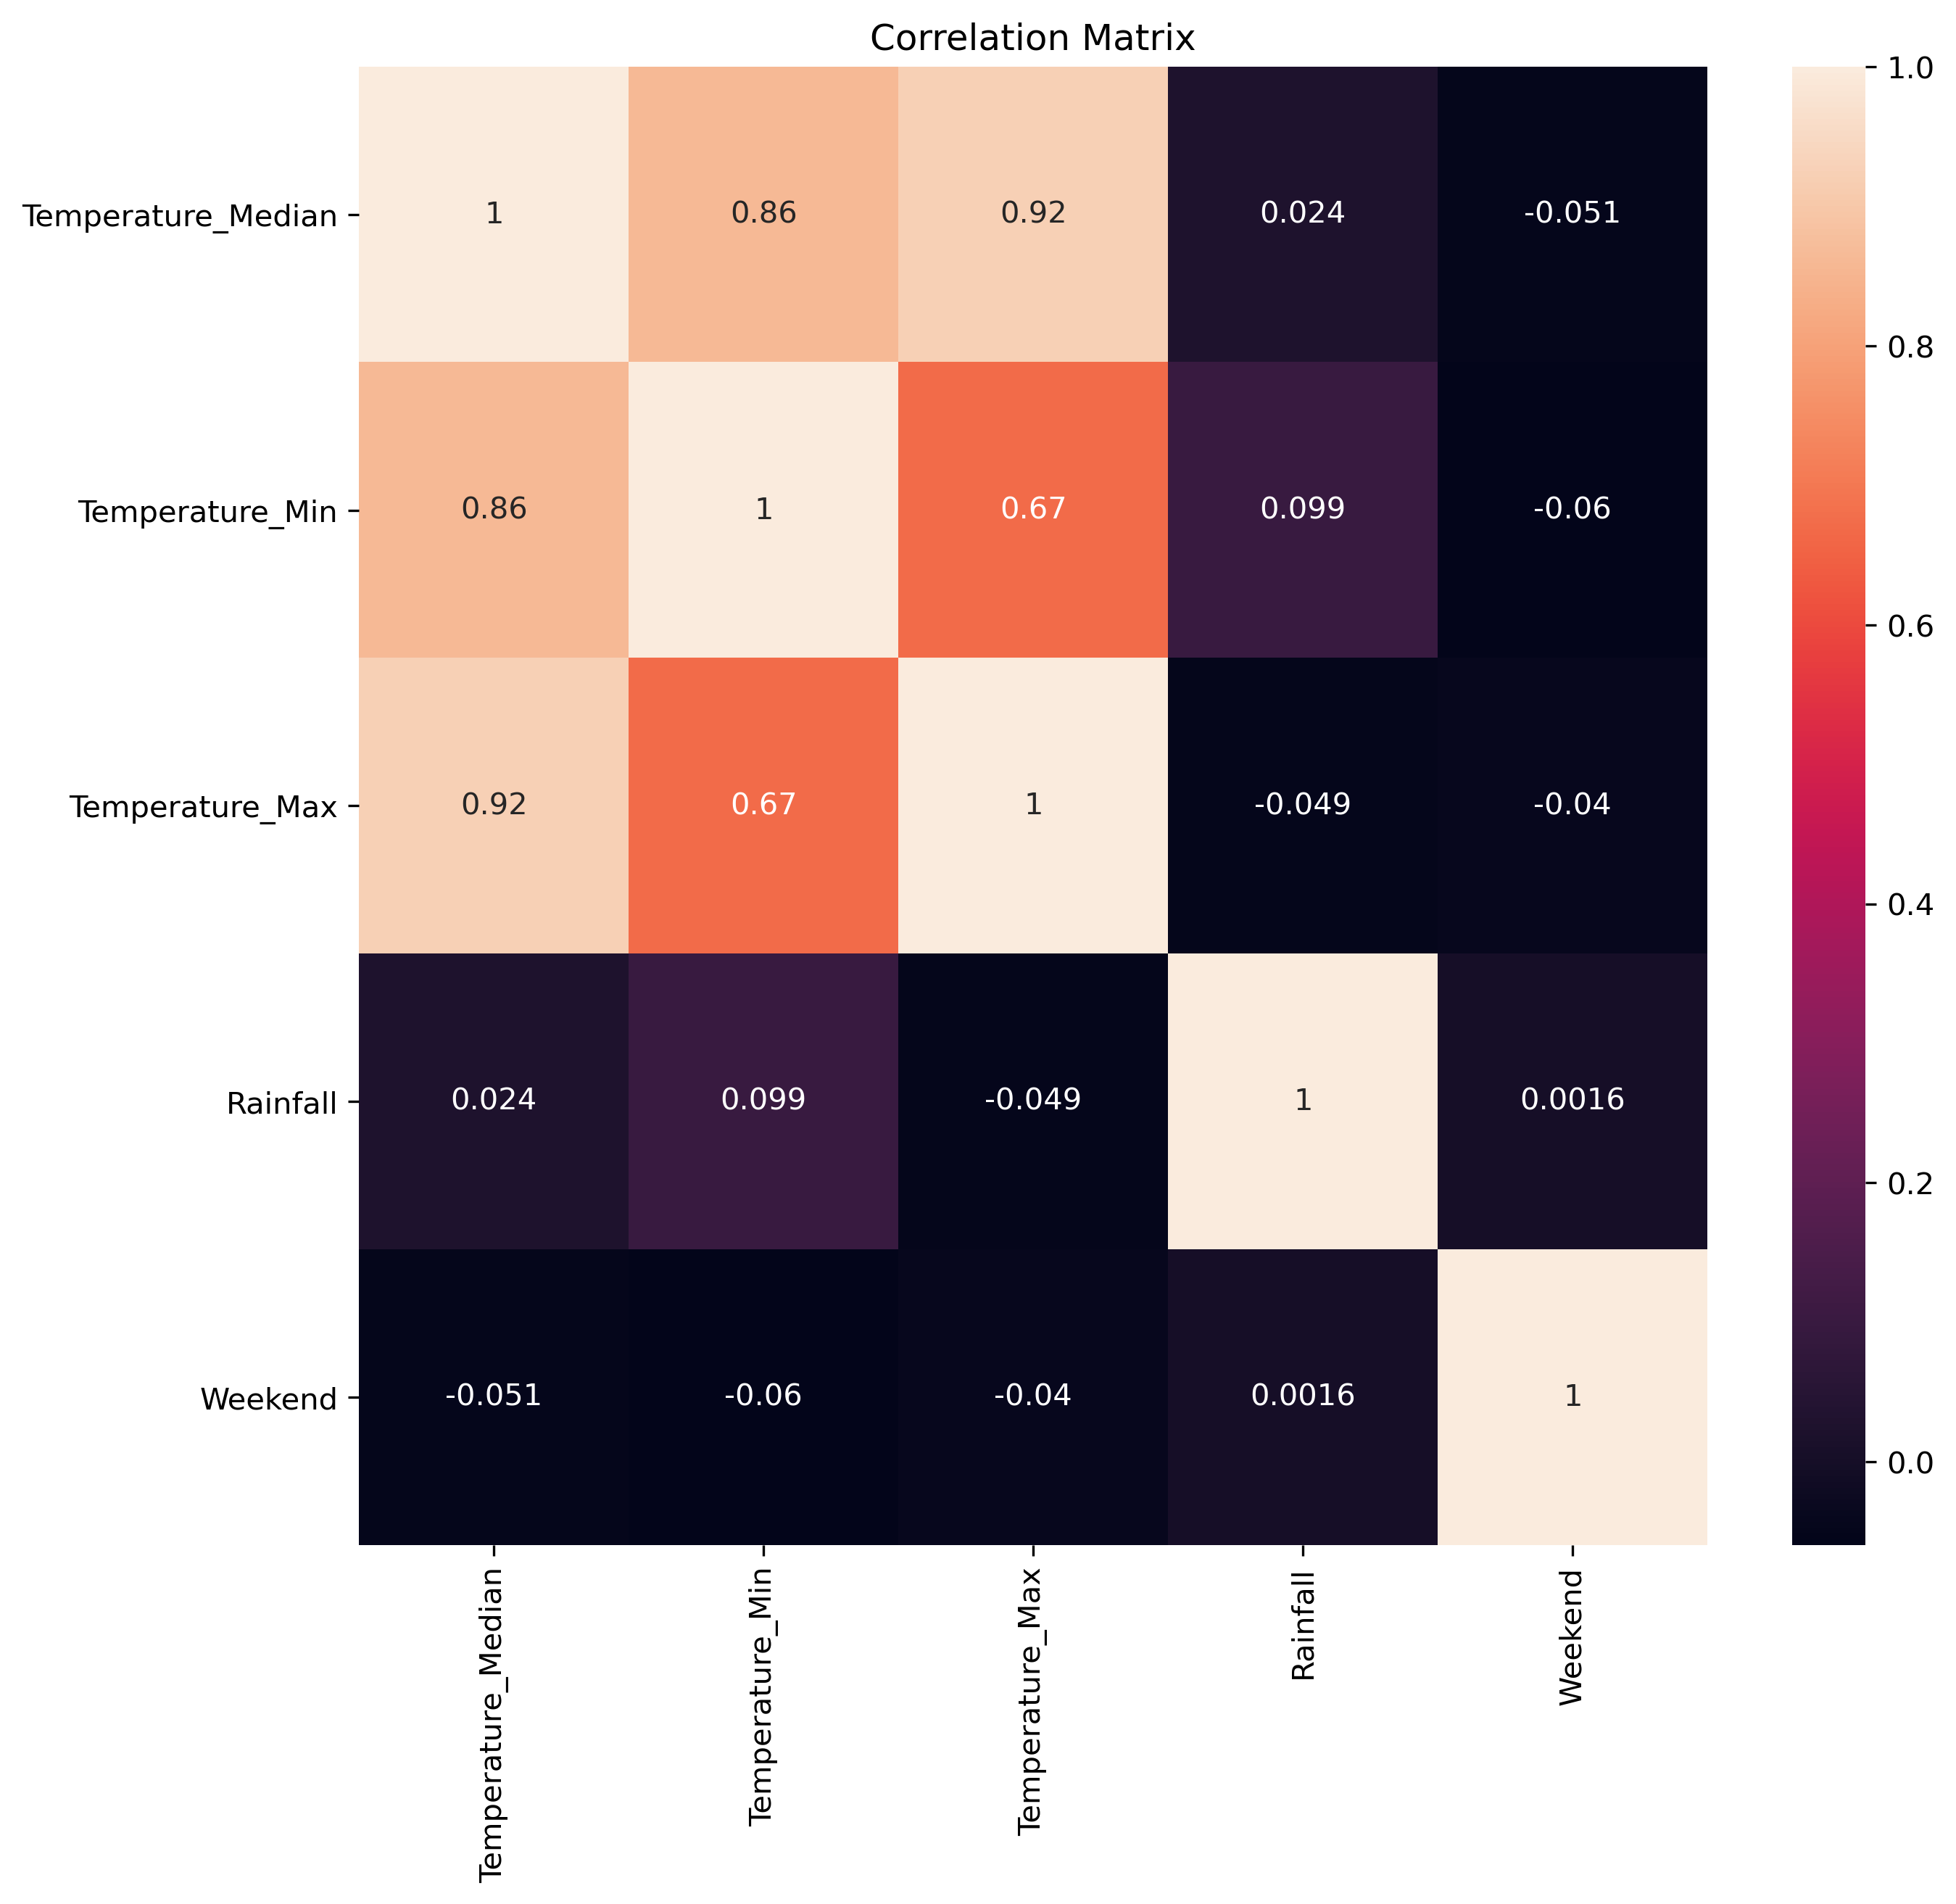

In [17]:
plt.figure(figsize=(10,9),dpi=300)
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

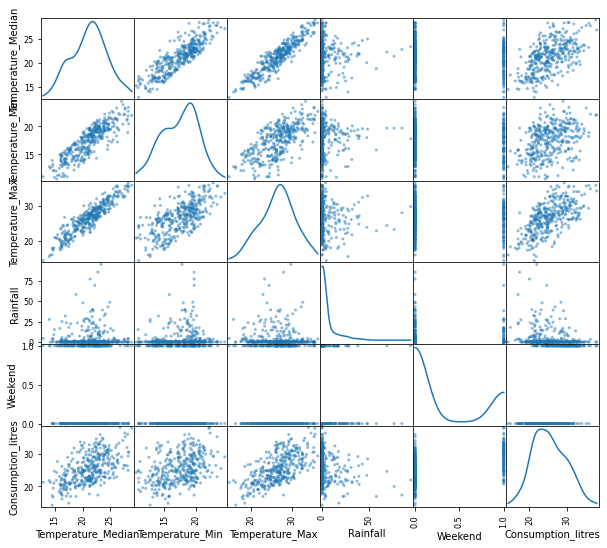

In [18]:
pd.plotting.scatter_matrix(beer_data,diagonal='kde',figsize=(10,9));

In [20]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

### As we can see that Temperature_.. values have high vif so we drop them one by one to see whether vif decreases.

In [21]:
vif

,Features,VIF
0,Temperature_Median,1087.797835
1,Temperature_Min,249.112601
2,Temperature_Max,436.529190
3,Rainfall,1.220276
4,Weekend,1.374283


In [22]:
#Dropping Median column
x = x.drop(columns=['Temperature_Median'])
x

,Temperature_Min,Temperature_Max,Rainfall,Weekend
0,23.9,32.5,0.0,0.0
1,24.5,33.5,0.0,0.0
2,22.4,29.9,0.0,1.0
3,21.5,28.6,1.2,1.0
4,21.0,28.3,0.0,0.0
...,...,...,...,...
360,21.1,28.2,13.6,1.0
361,21.1,26.7,0.0,0.0
362,20.3,24.1,10.3,0.0
363,19.3,22.4,6.3,0.0


In [24]:
vif2 = pd.DataFrame()
vif2['Features'] = x.columns
vif2['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif2

,Features,VIF
0,Temperature_Min,62.903327
1,Temperature_Max,61.914485
2,Rainfall,1.215937
3,Weekend,1.374087


### As we can see that after dropping two columns, vif has very small values near to 1 that is ideal.

In [25]:
# Now again dropping the next high vif column
x = x.drop(columns = ['Temperature_Min'])
vif3 = pd.DataFrame()
vif3['Features'] = x.columns
vif3['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif3

,Features,vif
0,Temperature_Max,1.528790
1,Rainfall,1.163160
2,Weekend,1.373842


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [28]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE {rmse}")
print(f"R2 {r2}")

RMSE 2.3881325325457334
R2 0.6997931017268433
